In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
df = pd.read_csv('netflix_titles.csv')

In [61]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [62]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [63]:
df.shape

(8807, 12)

In [64]:
df = df.drop(['director'],axis=1)

In [65]:
df.duplicated().sum()

0

In [66]:
df['cast'] = df['cast'].fillna('Unknown')

In [67]:
df['country'] = df['country'].fillna('Unknown')


In [68]:
df.isnull().sum()

show_id          0
type             0
title            0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [69]:
df.dropna(inplace=True)

In [70]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [71]:
df = df.drop(['show_id'],axis=1)

# Distribution of content types (Movie vs TV Show)

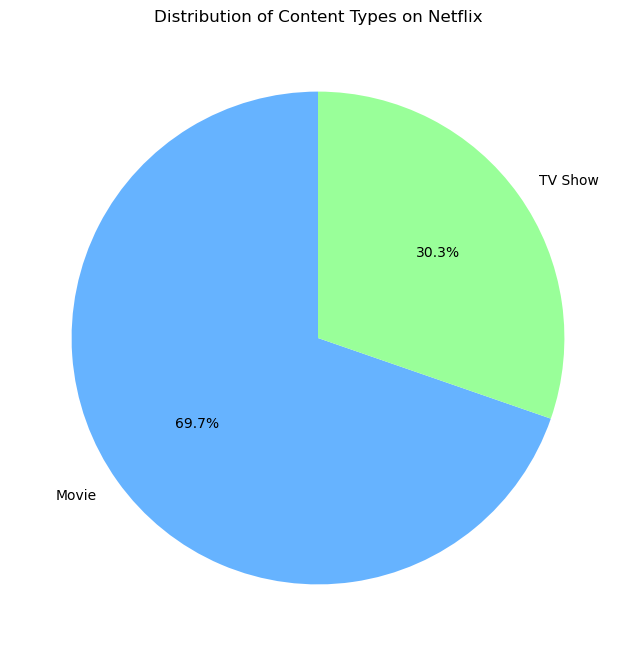

In [72]:

content_type_distribution = df['type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
content_type_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')  
plt.show()

# Trend content by Year

In [73]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [74]:
df['year_added'] = df['date_added'].dt.year

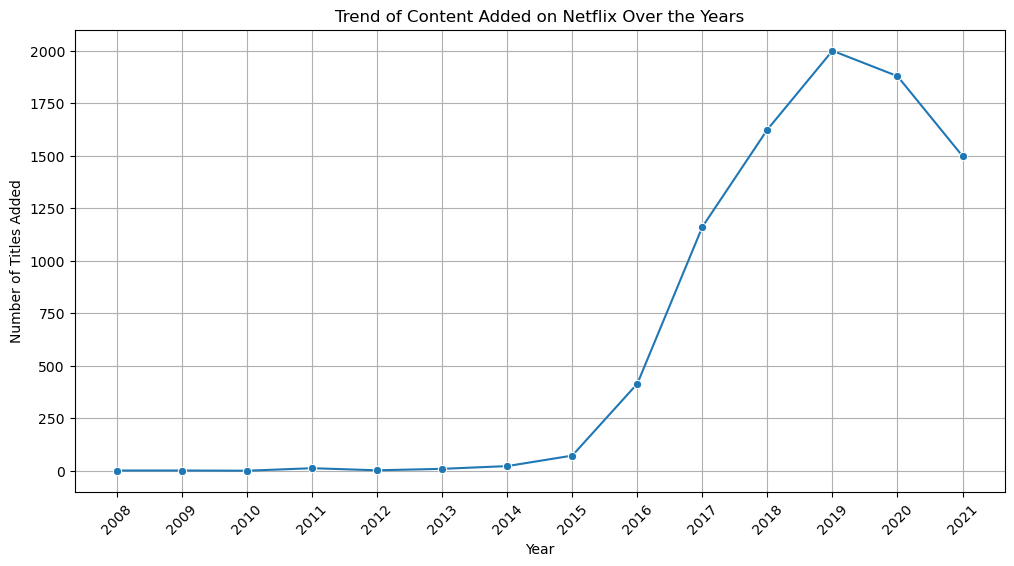

In [75]:
content_added_per_year = df['year_added'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_added_per_year.index, y=content_added_per_year.values, marker='o')
plt.title('Trend of Content Added on Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.xticks(content_added_per_year.index, rotation=45)
plt.grid(True)
plt.show()

# TOP COUNTRY

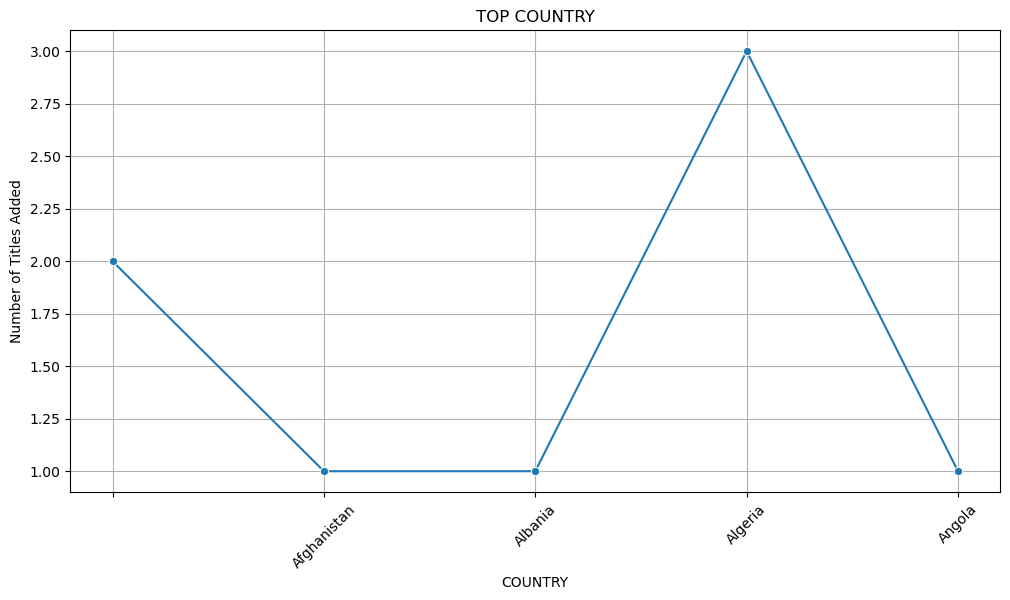

In [76]:
top_country = df['country'].str.split(', ').explode().value_counts().sort_index().head(5)

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=top_country.index, y=top_country.values, marker='o')
plt.title('TOP COUNTRY')
plt.xlabel('COUNTRY')
plt.ylabel('Number of Titles Added')
plt.xticks(top_country.index, rotation=45)
plt.grid(True)
plt.show()

In [77]:
df['rating'].nunique

<bound method IndexOpsMixin.nunique of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8790, dtype: object>

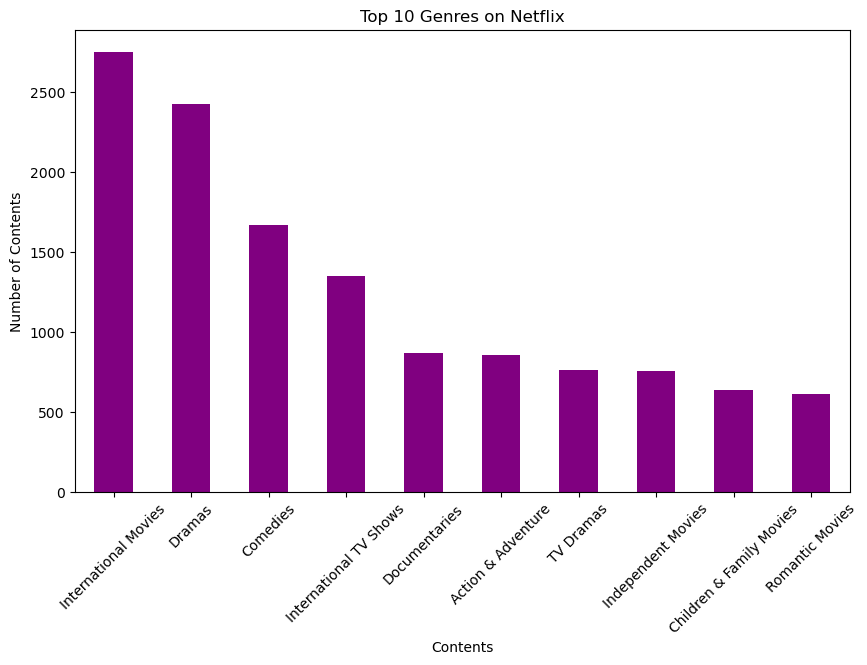

In [78]:
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Contents')
plt.ylabel('Number of Contents')
plt.xticks(rotation=45)
plt.show()

# Most Common Country for Netflix Content by Listed In Category

In [82]:
df = df.assign(country=df['country'].str.split(', ')).explode('country')
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

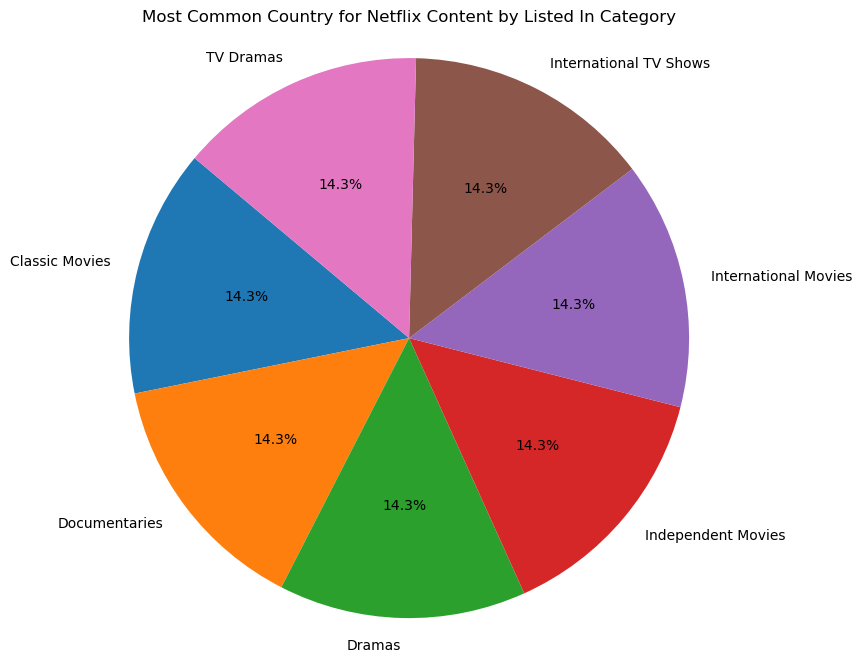

In [83]:
grouped = df.groupby(['country', 'listed_in']).size().reset_index(name='count').head(10)

# Find the most common country for each listed_in category
most_common_country = grouped.loc[grouped.groupby('listed_in')['count'].idxmax()]

# Plotting the pie chart for the most common country in each listed_in category
plt.figure(figsize=(10, 8))
plt.pie(most_common_country['count'], labels=most_common_country['listed_in'], autopct='%1.1f%%', startangle=140)
plt.title('Most Common Country for Netflix Content by Listed In Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top most of release year

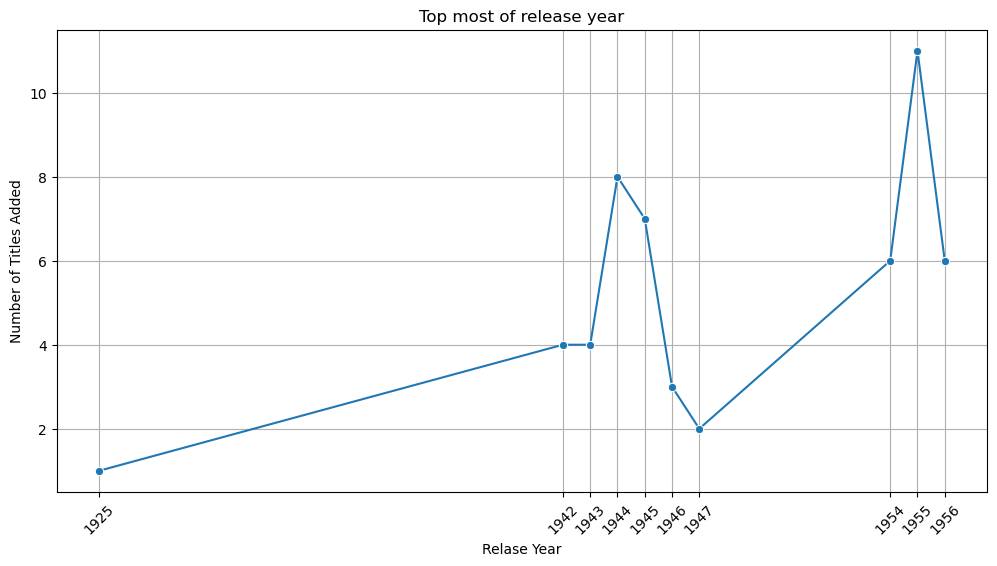

In [89]:
content_added_per_year = df['release_year'].value_counts().sort_index().head(10)

# Plotting the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_added_per_year.index, y=content_added_per_year.values, marker='o')
plt.title('Top most of release year')
plt.xlabel('Relase Year')
plt.ylabel('Number of Titles Added')
plt.xticks(content_added_per_year.index, rotation=45)
plt.grid(True)
plt.show()

# Distribution of Ratings

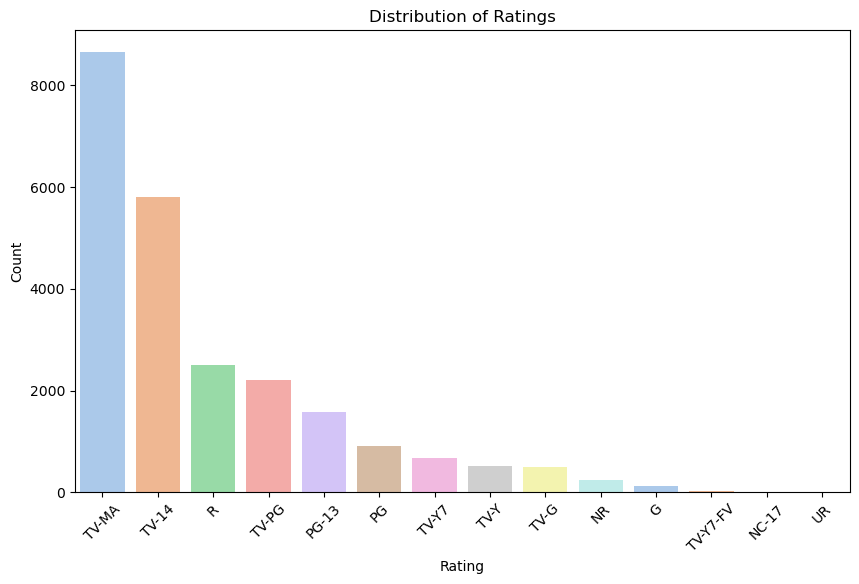

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='pastel', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()